We want to see which is faster: using operators (df.col1 + df.col2) or functions (df[[col1,col2]].sum()) when dealing with pandas dataframes.

In [3]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [4]:
df = pd.DataFrame({'col1':[2,3,4, np.nan], 'col2':[np.nan,2,4,10], 'col3':[5,4,np.nan,2]})
df

,col1,col2,col3
0,2.0,NaN,5.0
1,3.0,2.0,4.0
2,4.0,4.0,NaN
3,NaN,10.0,2.0


sum = df.col1.fillna(0) + df.col2.fillna(0) + df.col3.fillna(0)
sum = df[df.columns].sum(axis=1)


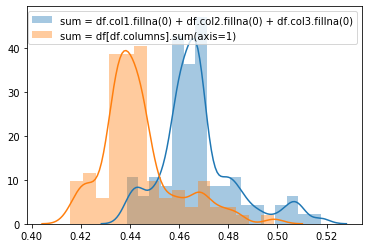

In [7]:
import timeit

setup = '''
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
df = pd.DataFrame({'col1':[2,3,4, np.nan], 'col2':[np.nan,2,4,10], 'col3':[5,4,np.nan,2]})
'''

f = ['sum = df.col1.fillna(0) + df.col2.fillna(0) + df.col3.fillna(0)', 'sum = df[df.columns].sum(axis=1)']

for func in f:
    print(func)
    sns.distplot(timeit.repeat(func, setup, repeat = 100, number = 1000), label=func)
plt.legend(loc='upper right')
plt.show()

    
#Can replace last line with other functions:
#    print(min(timeit.Timer(func, setup).repeat(3, 1000))) #for min time
#    print(np.mean(timeit.Timer(func, setup).repeat(3, 1000))) #for mean time
#    print(np.median(timeit.Timer(func, setup).repeat(3, 1000)))

Conclusion: Min, Mean, and Median all imply that .sum() function is slightly faster than using operators with .fillna(0), for our 3x4 df. The histograms imply the same: with operators, the x-axis ranges from .44 to .54 sec; with .sum() the range is .41-.48 sec. Both are right-skewed histograms.


We can prove this with a hypothesis test, where the null hypothesis is that there's no difference in speed between the two functions, and the alternative hypothesis is that there is a difference (we can do two-sided hypothesis test, assuming we don't already know that the .sum() function is faster).

In [5]:
#using scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')[source]

from scipy.stats import ttest_ind

setup = '''
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
df = pd.DataFrame({'col1':[2,3,4, np.nan], 'col2':[np.nan,2,4,10], 'col3':[5,4,np.nan,2]})
'''

f_sum = 'sum = df[df.columns].sum(axis=1)'
f_operator = 'sum = df.col1.fillna(0) + df.col2.fillna(0) + df.col3.fillna(0)'

time_sum = timeit.repeat(f_sum, setup, repeat = 100, number = 1000)
time_operator = timeit.repeat(f_operator, setup, repeat = 100, number = 1000)

ttest_ind(time_sum, time_operator)

Ttest_indResult(statistic=10.93806225566979, pvalue=4.361854861870976e-22)

The p-value is close to 0, so we throw out the null hypothesis (that the two methods have the same average runtime).